In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#### Lagrange Polynomials

% Lagrange basis polynomial
$$
L_i(x) = \prod_{\substack{j=0 \\ j \ne i}}^{n} \frac{x - x_j}{x_i - x_j}
$$

% Property of basis functions
$$
L_i(x_j) =
\begin{cases}
1, & j = i,\\[6pt]
0, & j \ne i.
\end{cases}
$$

% Lagrange interpolating polynomial
$$
P_n(x) = \sum_{i=0}^{n} y_i \, L_i(x)
= \sum_{i=0}^{n} y_i
\prod_{\substack{j=0 \\ j \ne i}}^{n} 
\frac{x - x_j}{x_i - x_j}
$$

% Example for n=2
$$
\begin{aligned}
P_2(x)
&= y_0 \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} 
 + y_1 \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)} 
 + y_2 \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)}.
\end{aligned}
$$


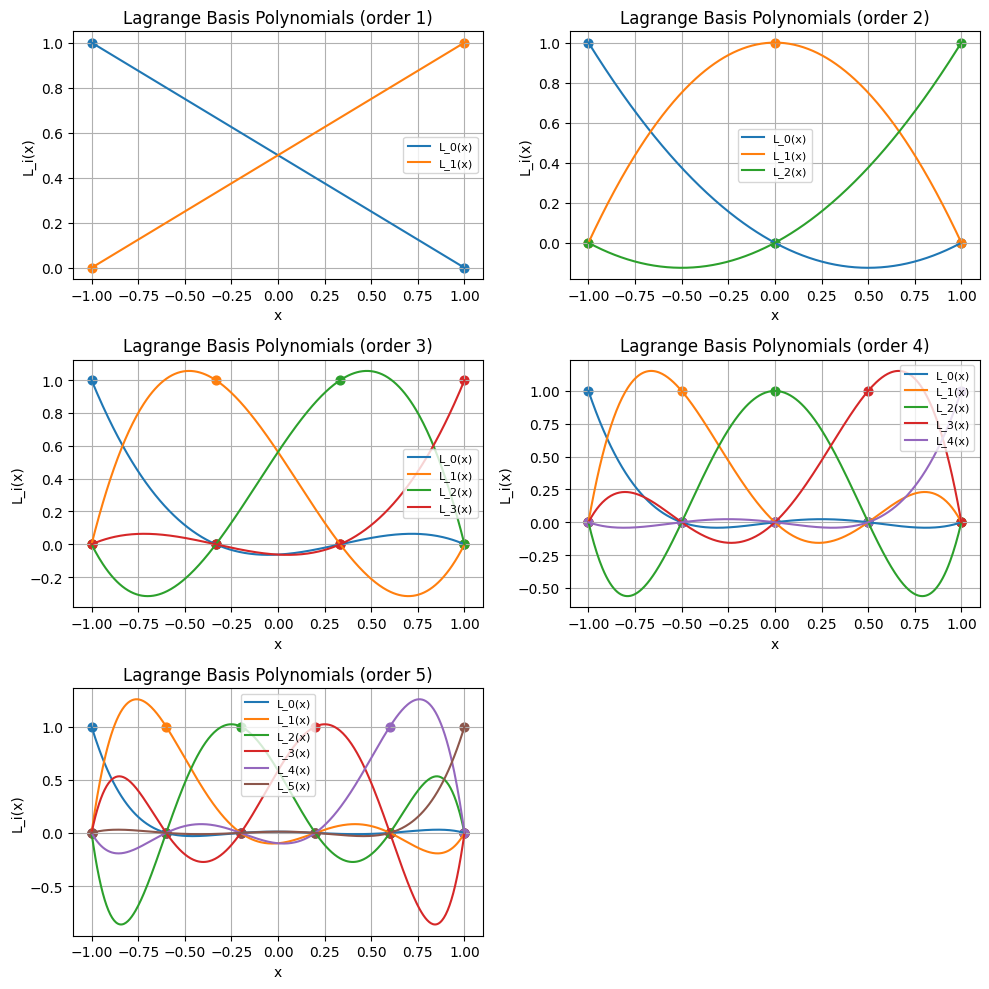

In [3]:
def lagrange_basis(x_nodes, i, x):
    """Compute the i-th Lagrange basis polynomial L_i(x) for given nodes."""
    L = np.ones_like(x)
    for j, xj in enumerate(x_nodes):
        if j != i:
            L *= (x - xj) / (x_nodes[i] - xj)
    return L

# Range of x for plotting
x = np.linspace(-1, 1, 400)

plt.figure(figsize=(10, 10))

# Loop for polynomial orders 1 through 5
for n in range(1, 6):
    x_nodes = np.linspace(-1, 1, n+1)
    plt.subplot(3, 2, n)
    for i in range(n+1):
        L_i = lagrange_basis(x_nodes, i, x)
        plt.plot(x, L_i, label=f"L_{i}(x)")
        plt.scatter(x_nodes, np.eye(n+1)[i], s=40)  # show interpolation points
    plt.title(f"Lagrange Basis Polynomials (order {n})")
    plt.xlabel("x")
    plt.ylabel("L_i(x)")
    plt.legend(fontsize=8, loc='best')
    plt.grid(True)

plt.tight_layout()
plt.show()


#### Legendre Polynomial: General Form and Properties


$$
P_n(x)
$$

% Rodrigues' formula (general form)
$$
P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} (x^2 - 1)^n
$$

% First few polynomials
$$
\begin{aligned}
P_0(x) &= 1, \\[6pt]
P_1(x) &= x, \\[6pt]
P_2(x) &= \tfrac{1}{2}(3x^2 - 1), \\[6pt]
P_3(x) &= \tfrac{1}{2}(5x^3 - 3x), \\[6pt]
P_4(x) &= \tfrac{1}{8}(35x^4 - 30x^2 + 3).
\end{aligned}
$$

% Orthogonality condition
$$
\int_{-1}^{1} P_m(x) P_n(x) \, dx =
\begin{cases}
0, & m \ne n, \\[6pt]
\dfrac{2}{2n + 1}, & m = n.
\end{cases}
$$

% Recurrence relation
$$
(n + 1) P_{n+1}(x) = (2n + 1)x P_n(x) - n P_{n-1}(x)
$$

% Normalization at x = 1
$$
P_n(1) = 1, \quad P_n(-1) = (-1)^n
$$

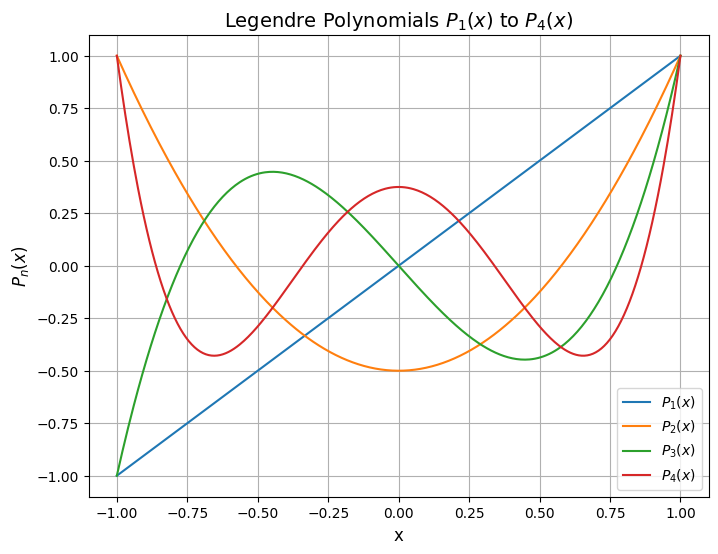

In [4]:
from numpy.polynomial.legendre import Legendre

# Define x range
x = np.linspace(-1, 1, 400)

plt.figure(figsize=(8, 6))

# Plot Legendre polynomials of order 1 to 4
for n in range(1, 5):
    Pn = Legendre.basis(n)
    plt.plot(x, Pn(x), label=f"$P_{n}(x)$")

# Formatting
plt.title("Legendre Polynomials $P_1(x)$ to $P_4(x)$", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("$P_n(x)$", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


#### How to find roots of the Legendre Polynomial?

* Determining Roots of Legendre Polynomial using Newton--Raphson Method


* Recurrence Relation for Legendre Polynomials

* The Legendre polynomials $P_n(x)$ satisfy the recurrence relation:
$$
P_0(x) = 1, \qquad P_1(x) = x,
$$

$$
P_n(x) = \frac{(2n-1)xP_{n-1}(x) - (n-1)P_{n-2}(x)}{n}.
$$

* Derivative of Legendre Polynomial

* The derivative of $P_n(x)$) can be expressed as:

$$
P_n'(x) = \frac{n}{x^2 - 1} \left[ xP_n(x) - P_{n-1}(x) \right].
$$


* To find a root of $P_n(x) = 0$, we use the Newton--Raphson method:

$$
x_{k+1} = x_k - \frac{P_n(x_k)}{P_n'(x_k)}.
$$

* The iteration continues until convergence:
$$
|x_{k+1} - x_k| < \varepsilon,
$$

* where $\varepsilon$ is a small tolerance (e.g., $10^{-12}$).

* Initial Guesses for the Roots

* A good set of initial guesses for the $n$ roots are given by:

$$
x_i^{(0)} = \cos\!\left( \frac{\pi(4i - 1)}{4n + 2} \right),
\qquad i = 1, 2, \ldots, n.
$$

* Example: Roots of $P_3(x)$

* The third-degree Legendre polynomial is:

$$
P_3(x) = \frac{1}{2}(5x^3 - 3x),
$$

* whose roots are obtained as:
$$
x = 0, \qquad x = \pm \sqrt{\frac{3}{5}} \approx \pm 0.77459667.
$$


In [3]:
# ---- Define Legendre polynomial and its derivative ----
def P_n(n, x):
    if n == 0:
        return 1.0
    elif n == 1:
        return x
    P0, P1 = 1.0, x
    for k in range(2, n + 1):
        Pk = ((2*k - 1)*x*P1 - (k - 1)*P0) / k
        P0, P1 = P1, Pk
    return P1

def P_n_prime(n, x):
    # derivative using formula
    if n == 0:
        return 0.0
    return n * (x*P_n(n, x) - P_n(n - 1, x)) / (x**2 - 1)

# ---- Newton-Raphson iteration ----
def legendre_roots_newton(n, tol=1e-12, max_iter=100):
    roots = []
    for i in range(1, n + 1):
        # initial guess
        x = np.cos(np.pi * (4*i - 1) / (4*n + 2))
        for _ in range(max_iter):
            dx = -P_n(n, x) / P_n_prime(n, x)
            x = x + dx
            if abs(dx) < tol:
                break
        roots.append(x)
    return np.sort(roots)

# ---- Example for n = 3 ----
n = 3
roots = legendre_roots_newton(n)
print(f"Roots of P_{n}(x):", roots)

# Check actual polynomial values at roots
for r in roots:
    print(f"P_{n}({r:.6f}) = {P_n(n, r):.2e}")


Roots of P_3(x): [-0.77459667  0.          0.77459667]
P_3(-0.774597) = 0.00e+00
P_3(0.000000) = -0.00e+00
P_3(0.774597) = 0.00e+00


#### Comparing Numerical integration schemes: Lagrange Interpolation vs Gaussian Quadrature

Example 1:

$$ \int_{-1}^{1} e^{x} dx $$

In [5]:
from scipy.integrate import quad
from numpy.polynomial.legendre import leggauss

# Function to integrate
f = lambda x: np.exp(x)

# Exact integral (via analytical formula)
I_exact = np.e - 1/np.e

# ---- Method 1: Lagrange interpolation (Simpson’s rule) ----
x_simpson = np.array([-1.0, 0.0, 1.0])
y_simpson = f(x_simpson)
# Simpson’s weights for 3 equally spaced points: [1, 4, 1] * h/3, h = 1
I_simpson = (1/3) * (y_simpson[0] + 4*y_simpson[1] + y_simpson[2])

# ---- Method 2: 2-point Gauss–Legendre quadrature ----
xg, wg = leggauss(2)
I_gauss = np.sum(wg * f(xg))

# Print results
print(f"Exact integral:            {I_exact:.10f}")
print(f"Simpson (Lagrange):        {I_simpson:.10f},  Error = {abs(I_simpson - I_exact):.2e}")
print(f"Gauss–Legendre (2-point):  {I_gauss:.10f},  Error = {abs(I_gauss - I_exact):.2e}")

Exact integral:            2.3504023873
Simpson (Lagrange):        2.3620537565,  Error = 1.17e-02
Gauss–Legendre (2-point):  2.3426960879,  Error = 7.71e-03


Example 2:

$$ \int_{-1}^{1} cos(3x) dx $$

In [5]:
from numpy.polynomial.legendre import leggauss
from scipy.integrate import quad

# Define the function
f = lambda x: np.cos(3*x)

# Exact integral (via scipy for reference)
I_exact, _ = quad(f, -1, 1)

# ---- Newton–Cotes (Lagrange interpolation) ----
# We'll use Simpson’s rule (3 equally spaced points) and 5-point rule for comparison
def newton_cotes(f, n):
    x = np.linspace(-1, 1, n)
    y = f(x)
    h = (x[-1] - x[0]) / (n - 1)
    if n == 3:  # Simpson's rule
        return (h/3) * (y[0] + 4*y[1] + y[2])
    elif n == 5:  # 4th-order Newton–Cotes
        return (2*h/45) * (7*y[0] + 32*y[1] + 12*y[2] + 32*y[3] + 7*y[4])
    else:
        raise ValueError("Only 3 or 5 points supported for this demo")

I_simpson = newton_cotes(f, 3)
I_nc5 = newton_cotes(f, 5)

# ---- Gaussian quadrature ----
xg2, wg2 = leggauss(2)
xg4, wg4 = leggauss(4)
I_gauss2 = np.sum(wg2 * f(xg2))
I_gauss4 = np.sum(wg4 * f(xg4))

# ---- Print results ----
print(f"Exact integral:           {I_exact:.10f}")
print(f"Simpson (3-point):        {I_simpson:.10f}   Error = {abs(I_simpson - I_exact):.2e}")
print(f"Newton–Cotes (5-point):   {I_nc5:.10f}   Error = {abs(I_nc5 - I_exact):.2e}")
print(f"Gauss–Legendre (2-point): {I_gauss2:.10f}   Error = {abs(I_gauss2 - I_exact):.2e}")
print(f"Gauss–Legendre (4-point): {I_gauss4:.10f}   Error = {abs(I_gauss4 - I_exact):.2e}")


Exact integral:           0.0940800054
Simpson (3-point):        0.6733383356   Error = 5.79e-01
Newton–Cotes (5-point):   0.0592730212   Error = 3.48e-02
Gauss–Legendre (2-point): -0.3211130771   Error = 4.15e-01
Gauss–Legendre (4-point): 0.0925705143   Error = 1.51e-03
